In [1]:

import csv
from pprint import pprint
import numpy as np
# Import the files and read in the data
# Remove the last two lines and first two lines
with open('data.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    table = []
    for row in spamreader:
        table.append(row)
    newtable=table[1:-3]
    time = np.asarray([item[0] for item in newtable])
    data = np.asarray([float(item[1]) for item in newtable])

In [2]:
# Import the necessary dependencies
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


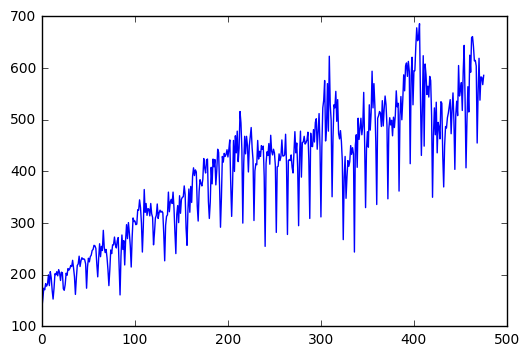

In [3]:
# Plot the data
# The data shows a gradual increase with some slight periodicity
plt.plot(data)
plt.show()

In [4]:
# Normalize the data in order to apply an LSTN RNN
scalar = MinMaxScaler(feature_range=(0,1))
dataset = scalar.fit_transform(data)

/Users/Steffi/tensorflow/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Steffi/tensorflow/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


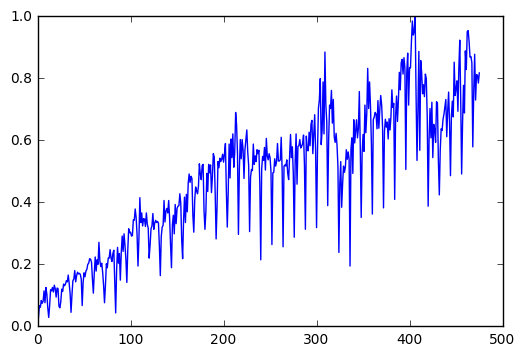

In [5]:
# display the normalized data  
plt.plot(dataset)
plt.show()

In [6]:
# Split the data into training and testing sets
train_x = dataset[0:375]
test_x = dataset[375:]

In [7]:
print("# train samples: %d\n# test samples: %d" %(len(train_x), len(test_x)))

# train samples: 375
# test samples: 101


In [8]:
# Function for defining look back data so the observations include input from past time steps 
def create_dataset(dataset,look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:i+look_back]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX),np.array(dataY)

In [9]:
# set a look_back of 3 and modify accordingly
look_back = 3
trainX,trainY = create_dataset(train_x,look_back)
testX,testY = create_dataset(test_x,look_back)

In [ ]:
# Reshape the test and train data in preparation for the training
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# Define the model
model = Sequential()
model.add(LSTM(4,input_dim=1,activation="tanh"))
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error',optimizer='adam')
# Fit the model
model.fit(trainX,trainY,nb_epoch=100,batch_size=1, verbose=2)

Epoch 1/100
12s - loss: 0.0215
Epoch 2/100
9s - loss: 0.0091
Epoch 3/100
9s - loss: 0.0080
Epoch 4/100
9s - loss: 0.0078
Epoch 5/100
9s - loss: 0.0078
Epoch 6/100
11s - loss: 0.0078
Epoch 7/100
12s - loss: 0.0076
Epoch 8/100
9s - loss: 0.0077
Epoch 9/100


In [ ]:
trainPredict=model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trP = scalar.inverse_transform(trainPredict)
trY = scalar.inverse_transform([trainY])
teP = scalar.inverse_transform(testPredict)
teY = scalar.inverse_transform([testY])

In [ ]:
# Compute the mean squared errors
trainScore = np.sqrt(mean_squared_error(trY[0],trP))
testScore = np.sqrt(mean_squared_error(teY[0],teP))

In [ ]:
print('Train Score: %.2f RMSE\nTest Score: %.2f RMSE' % (trainScore, testScore))

In [ ]:
# Plot the model's predictions and visually analyse the performance 
# shift train predictions for plotting
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back]=trP.flatten()
# shift test predictions for plot
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:]=np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1]=teP.flatten()
#  plot baseline and predictions
plt.plot(scalar.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The RMSE scores are reasonable. Changing the lookback to 5 did not improve the RMSE score as much. A lookback of 3 provided the best results yet.